# 가중치

인구통계학적 데이터

In [5]:
cat = pd.read_csv("data/0207_catboost_all.csv")
del cat["Unnamed: 0"]

### 주유소 컬럼 추가

In [6]:
oil = pd.read_csv("data/0212_fa_all.csv", encoding = "cp949")
del oil["Unnamed: 0"]
del oil["CATEGORY_GROUP_CODE_419"]
oil.columns = ["oil_GS" if x == "CATEGORY_GROUP_CODE_231" else x for x in oil.columns]
oil.columns = ["oil_SK" if x == "CATEGORY_GROUP_CODE_232" else x for x in oil.columns]
oil.columns = ["oil_S-oil" if x == "CATEGORY_GROUP_CODE_233" else x for x in oil.columns]
oil.columns = ["oil_HD" if x == "CATEGORY_GROUP_CODE_234" else x for x in oil.columns]

In [7]:
oil["use_oil"] = oil.apply(lambda x: 1 if x["oil_GS"]+x["oil_SK"]+x["oil_S-oil"]+x["oil_HD"] == 1 else 0 , axis =1)

In [8]:
oil_r = oil[oil["use_oil"] == 1]
del oil_r["use_oil"]
print(oil_r.shape)
oil_r.head()

(686, 2233)


,PANEL_ID,gender,age_10,age_m,region_sido,region,wedding,education,job,family_num,family_baby,family_child,family_elementary,family_middle,family_high,family_silver,income,home,home_own,total_app,cnt_10x10,cnt_11번가,cnt_11번가쇼킹딜,cnt_1Q MTS,cnt_1Q 통합인증,cnt_280days,cnt_4shared,cnt_?손전등,cnt_ABC-MART,cnt_AIA Vitality T건강걷기,cnt_AK PLAZA,cnt_APT2you,cnt_Adobe Acrobat,cnt_AfreecaTV,cnt_AhnLab V3 Mobile Plus 2.0,cnt_AhnLab V3 Mobile Security,cnt_AliExpress,cnt_B612,cnt_BADA MP3,cnt_BAND,cnt_BLX,cnt_BLX X,cnt_BNK통합인증,cnt_BabyTime,cnt_BeautyPlus,cnt_Between,cnt_Booking.com,cnt_Burgerking,cnt_BuzzVideo,cnt_CBS 레인보우,cnt_CGV,cnt_CGV포토티켓,cnt_CJ ONE,cnt_CJmall,cnt_CJ대한통운 택배,cnt_CJ온마트,cnt_CLiP,cnt_CLiP 잠금화면,cnt_CLiP 휴대폰지키미,cnt_CYBOS Touch,cnt_Cake,cnt_CamScanner,cnt_Camera360,cnt_Candy Crush Saga,cnt_Chrome,cnt_Clean Master,cnt_CokePLAY,cnt_Cookie Run: OvenBreak,cnt_Cyworld,cnt_DB손해보험,cnt_DGB 개인뱅킹,cnt_Dacota,cnt_Discord,cnt_Dolphin,cnt_Donpush,cnt_Dropbox,cnt_Duo,cnt_E:LAND E:AT,cnt_ES 파일 탐색기,cnt_Evernote,cnt_Excel,cnt_FIFA Online 4 M,cnt_Facebook,cnt_Flo,cnt_Flud,cnt_Fly GPS,cnt_Foodie,cnt_GS SHOP,cnt_GS 프레시,cnt_GS&POINT,cnt_GS수퍼마켓,cnt_Galaxy Wearable,cnt_Gardenscapes,cnt_Gmail,cnt_Google,cnt_Google Play 게임,cnt_Google Play 무비,cnt_Google Play 뮤직,cnt_G마켓,cnt_G마켓SFC,cnt_H.Point,cnt_Happy Color,cnt_Harry Potter,cnt_Helix Jump,cnt_Homescapes,cnt_Hotels.com,cnt_H패션몰,cnt_ISP/페이북,cnt_InBody,cnt_InstaSize,cnt_Instagram,cnt_IoT@home,cnt_JAM Live,cnt_JinAir,cnt_Jorte,cnt_KBS kong,cnt_KBS my K,cnt_KB국민카드,cnt_KB스마트원 통합인증,cnt_KB스타뱅킹,cnt_KB스타알림,cnt_KB앱카드,cnt_KEB 하나은행,cnt_KFC,cnt_KT 멤버십,cnt_KT 패밀리박스,cnt_KakaoTalk,cnt_Keep 메모,cnt_K쇼핑,cnt_L.POINT,cnt_L.pay,cnt_LFmall,cnt_LG 페이,cnt_LG 헬스,cnt_LG전자 멤버십,cnt_LH청약센터,cnt_LINE,cnt_LINE Camera,cnt_LINE WORKS,cnt_LIVE스코어,cnt_LinkedIn,cnt_Lite,cnt_LoL 프렌즈,cnt_LookPin,cnt_M-able,cnt_MBC mini,cnt_MG상상뱅크,cnt_MG새마을금고,cnt_MOBI,cnt_MOLDIV,cnt_MONEY TREE,cnt_MOQA,cnt_MP3 Video Converter,cnt_MX 플레이어,cnt_MX 플레이어 Pro,cnt_MangoPlate,cnt_Meitu,cnt_Melon,cnt_Messenger,cnt_Mi 피트,cnt_Mi 홈,cnt_Minecraft,cnt_Mnet,cnt_MobileCX,cnt_MobileLab,cnt_Most,cnt_Musinsa,cnt_MyNB,cnt_NAVER,cnt_NH뱅킹,cnt_NH스마트 알림,cnt_NH스마트인증,cnt_NH카드,cnt_NH콕뱅크,cnt_NH투자증권 QV,cnt_NS홈쇼핑,cnt_NUGU,cnt_Netflix,cnt_NotiScreen,cnt_NotiToMe,cnt_N푸드,cnt_OK Cashbag,cnt_OK 저축은행,cnt_ONE알림,cnt_OP.GG,cnt_OTP,cnt_OneDrive,cnt_OneNote,cnt_Outlook,cnt_P Tracker,cnt_PASS,cnt_PAYCO,cnt_PDF에 쓰기,cnt_PICOOC,cnt_POOQ,cnt_Papago,cnt_Paynow,cnt_Peel Remote,cnt_Photo Wonder,cnt_PicsArt,cnt_Pinterest,cnt_Pokemon GO,cnt_Polaris Office,cnt_PowerPoint,cnt_Puffin,cnt_Q-Net,cnt_Q.Feat,cnt_QR Scanner,cnt_QR 코드 스캐너,cnt_Qoo10,cnt_QuickPic,cnt_Q보이스,cnt_Repost,cnt_S-OIL 구도일 Family,cnt_SBS,cnt_SBS고릴라,cnt_SC제일은행,cnt_SK stoa,cnt_SK엔카,cnt_SNOW,cnt_SR 고속열차,cnt_SSG.COM,cnt_SSGPAY,cnt_STARPLE,cnt_Samsung Health,cnt_Samsung Members,cnt_Samsung Music,cnt_Samsung Notes,cnt_Samsung Pay,cnt_Security Master,cnt_Send Anywhere,cnt_Shift 3,cnt_Skype,cnt_Skyscanner,cnt_Smart Switch,cnt_Smart ThinQ,cnt_Smart able,cnt_Smart?Things,cnt_SoundCloud,cnt_Steam,cnt_Strava,cnt_StyleShare,cnt_Syrup 월렛,cnt_S노트,cnt_S보이스,cnt_S알리미,cnt_T map,cnt_T map 대중교통,cnt_T pay,cnt_T 가드,cnt_TISTORY,cnt_TIViewer,cnt_TOP Browser,cnt_TVING,cnt_TV포인트,cnt_TeamViewer,cnt_The Day Before,cnt_TikTok,cnt_Toluna,cnt_Toon Blast,cnt_TubeDown,cnt_TubeMate,cnt_Tumblr,cnt_Twitch,cnt_T멤버십,cnt_T연락처,cnt_T전화,cnt_U+ 고객센터,cnt_U+ 잠금화면,cnt_U+Box (클라우드),cnt_U+멤버스,cnt_U+스팸차단,cnt_U+알뜰모바일 고객센터,cnt_U+프로야구,cnt_U-OTP+,cnt_UNIQLO,cnt_URX,cnt_V LIVE,cnt_V-Guard for Web,cnt_Vingle,cnt_WeChat,cnt_Whale,cnt_WhatsApp,cnt_Word,cnt_World War Rising,cnt_XPlayer,cnt_YES24 공연,cnt_YES24 영화,cnt_YT Kids,cnt_YouTube,cnt_YouTube Music,cnt_Y데이터박스,cnt_ZZAL,cnt_aTorrent,cnt_blind,cnt_e알리미,cnt_i-Adsnap,cnt_i-ONE뱅크,cnt_iHerb,cnt_kakaoTV Live,cnt_kong,cnt_kt M모바일,cnt_m.Stock,cnt_mVaccine for web,cnt_momQ,cnt_oksusu,cnt_sABN,cnt_sTrack,cnt_surveybilly,cnt_μTorrent,cnt_가스락,cnt_갤러리,cnt_갤럽패널,cnt_검은사막 모바일,cnt_경기버스정보,cnt_경품모아,cnt_계산기,cnt_계산기 플러스,cnt_계좌통합관리,cnt_고객센터,cnt_고속도로 교통정보,cnt_고속버스 모바일,cnt_고용노동부 HRD-

In [9]:
oil_r.iloc[:,-4:].to_csv("data/0220_target_col.csv")

In [10]:
# 가중치 없이 gephi
oil_o = oil_r.iloc[:,1:]

In [11]:
oil_count = oil_r.groupby(["gender","age_10"]).count()["PANEL_ID"].reset_index()
oil_count["gender-age"] = ["1-2","1-3","1-4","1-5","1-6","2-2","2-3","2-4","2-5","2-6"]
oil_count = oil_count[["gender-age", "PANEL_ID"]]
oil_count.columns = ["gender-age","count"]
oil_count["sex"] = [1,1,1,1,1,0,0,0,0,0]

In [12]:
oil_count

,gender-age,count,sex
0,1-2,41,1
1,1-3,171,1
2,1-4,128,1
3,1-5,36,1
4,1-6,8,1
5,2-2,44,0
6,2-3,147,0
7,2-4,86,0
8,2-5,22,0
9,2-6,3,0


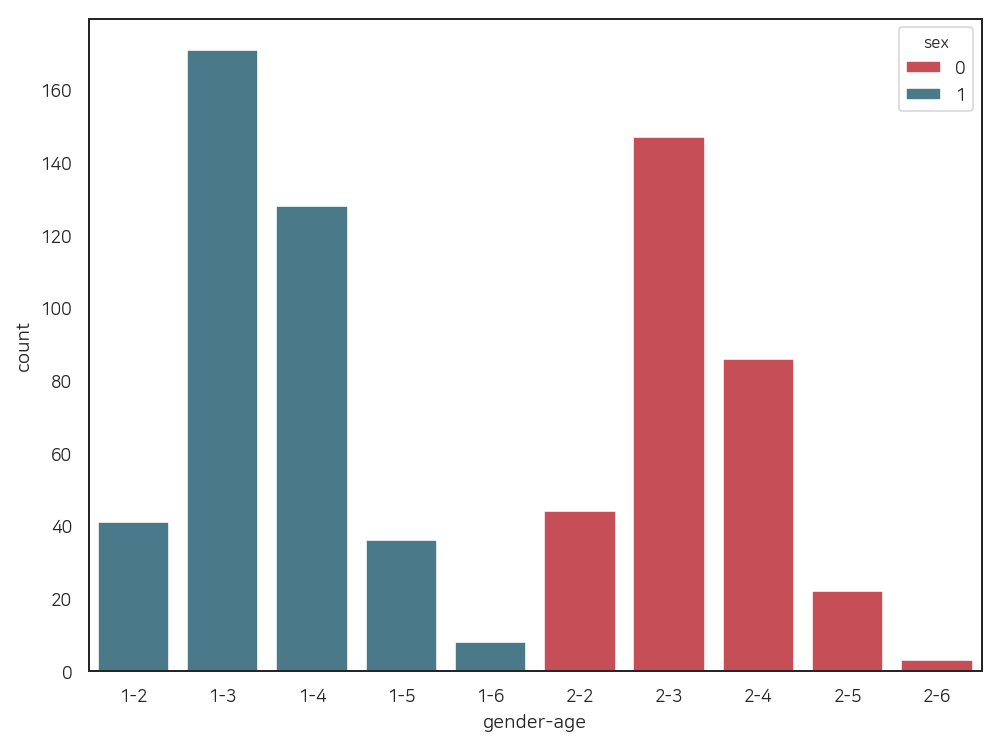

In [13]:
figure, (ax1) = plt.subplots(nrows = 1, ncols = 1)
figure.set_size_inches(8,6)
sns.barplot(data = oil_count, x = "gender-age", y = "count", hue = "sex", dodge=False, palette=sns.diverging_palette(10, 220, sep=80, n=2) , ax = ax1);

In [14]:
oil_ratio = oil_count.copy()
oil_ratio["count"] = oil_count["count"].apply(lambda x: x/sum(oil_count["count"]))
oil_ratio.columns = ["gender-age","ratio","sex"]
oil_ratio["sex"] = [1,1,1,1,1,0,0,0,0,0]
oil_ratio

,gender-age,ratio,sex
0,1-2,0.059767,1
1,1-3,0.249271,1
2,1-4,0.186589,1
3,1-5,0.052478,1
4,1-6,0.011662,1
5,2-2,0.064140,0
6,2-3,0.214286,0
7,2-4,0.125364,0
8,2-5,0.032070,0
9,2-6,0.004373,0


## 인구통계

In [15]:
total_population = pd.read_csv("data/0214_total_population.csv", encoding = "cp949")

In [16]:
total_population

,행정구역,2019년01월_남_연령구간인구수,2019년01월_남_0~9세,2019년01월_남_10~19세,2019년01월_남_20~29세,2019년01월_남_30~39세,2019년01월_남_40~49세,2019년01월_남_50~59세,2019년01월_남_60~69세,2019년01월_남_70~79세,2019년01월_남_80~89세,2019년01월_남_90~99세,2019년01월_남_100세 이상,2019년01월_여_연령구간인구수,2019년01월_여_0~9세,2019년01월_여_10~19세,2019년01월_여_20~29세,2019년01월_여_30~39세,2019년01월_여_40~49세,2019년01월_여_50~59세,2019년01월_여_60~69세,2019년01월_여_70~79세,2019년01월_여_80~89세,2019년01월_여_90~99세,2019년01월_여_100세 이상
0,전국 (0000000000),25865518,2200502,2654733,3587672,3713637,4312467,4346428,2921886,1555183,520615,47991,4404,25960769,2086496,2462444,3228249,3534053,4171809,4282868,3056632,1950620,1008510,164528,14560


In [17]:
male_total = total_population.iloc[:,1:2].values[0][0]
fe_total =  total_population.iloc[:,13:14].values[0][0]
total = male_total + fe_total
male = total_population.iloc[:, 2:13]
male.columns = range(11)
female = total_population.iloc[:,14:]
female.columns = range(11)
all_pop = pd.concat([male, female])
all_pop.index= [1,2]

In [18]:
all_pop

,0,1,2,3,4,5,6,7,8,9,10
1,2200502,2654733,3587672,3713637,4312467,4346428,2921886,1555183,520615,47991,4404
2,2086496,2462444,3228249,3534053,4171809,4282868,3056632,1950620,1008510,164528,14560


In [19]:
pop_ratio = all_pop.applymap(lambda x : x/total)


In [20]:
pop_ratio

,0,1,2,3,4,5,6,7,8,9,10
1,0.042459,0.051224,0.069225,0.071655,0.083210,0.083865,0.056378,0.030008,0.010045,0.000926,0.000085
2,0.040259,0.047513,0.062290,0.068190,0.080496,0.082639,0.058978,0.037638,0.019459,0.003175,0.000281


In [21]:
sum(sum(pop_ratio.values))

1.0

In [22]:
pop_ratio[11] = pop_ratio.apply(lambda x: sum(x[[6,7,8,9,10]]), axis =1)

In [23]:
pop_ratio_6 = pop_ratio.drop([6,7,8,9,10], axis = 1)

In [24]:
pop_ratio_6

,0,1,2,3,4,5,11
1,0.042459,0.051224,0.069225,0.071655,0.083210,0.083865,0.097442
2,0.040259,0.047513,0.062290,0.068190,0.080496,0.082639,0.119531


In [25]:
pop_ratio_plot = pop_ratio_6.copy()
pop_ratio_plot.columns = [0,1,2,3,4,5,6]
pop_ratio_plot = pop_ratio_plot[[2,3,4,5,6]]
pop_ratio_plot_1 = pop_ratio_plot.iloc[0:1,:]
pop_ratio_plot_2 = pop_ratio_plot.iloc[1:2,:]
pop_ratio_plot_2.index = [1]
pop_ratio_plot = pd.concat([pop_ratio_plot_1, pop_ratio_plot_2], axis = 1)
pop_ratio_plot = pop_ratio_plot.T
pop_ratio_plot["gender-age"] = ["1-2","1-3","1-4","1-5","1-6","2-2","2-3","2-4","2-5","2-6"]
pop_ratio_plot.columns = ["ratio","gender-age"]
pop_ratio_plot = pop_ratio_plot[["gender-age","ratio"]]
pop_ratio_plot.index = [0,1,2,3,4,5,6,7,8,9]
pop_ratio_plot["sex"] = [1,1,1,1,1,0,0,0,0,0]

In [26]:
pop_ratio_plot

,gender-age,ratio,sex
0,1-2,0.069225,1
1,1-3,0.071655,1
2,1-4,0.083210,1
3,1-5,0.083865,1
4,1-6,0.097442,1
5,2-2,0.062290,0
6,2-3,0.068190,0
7,2-4,0.080496,0
8,2-5,0.082639,0
9,2-6,0.119531,0


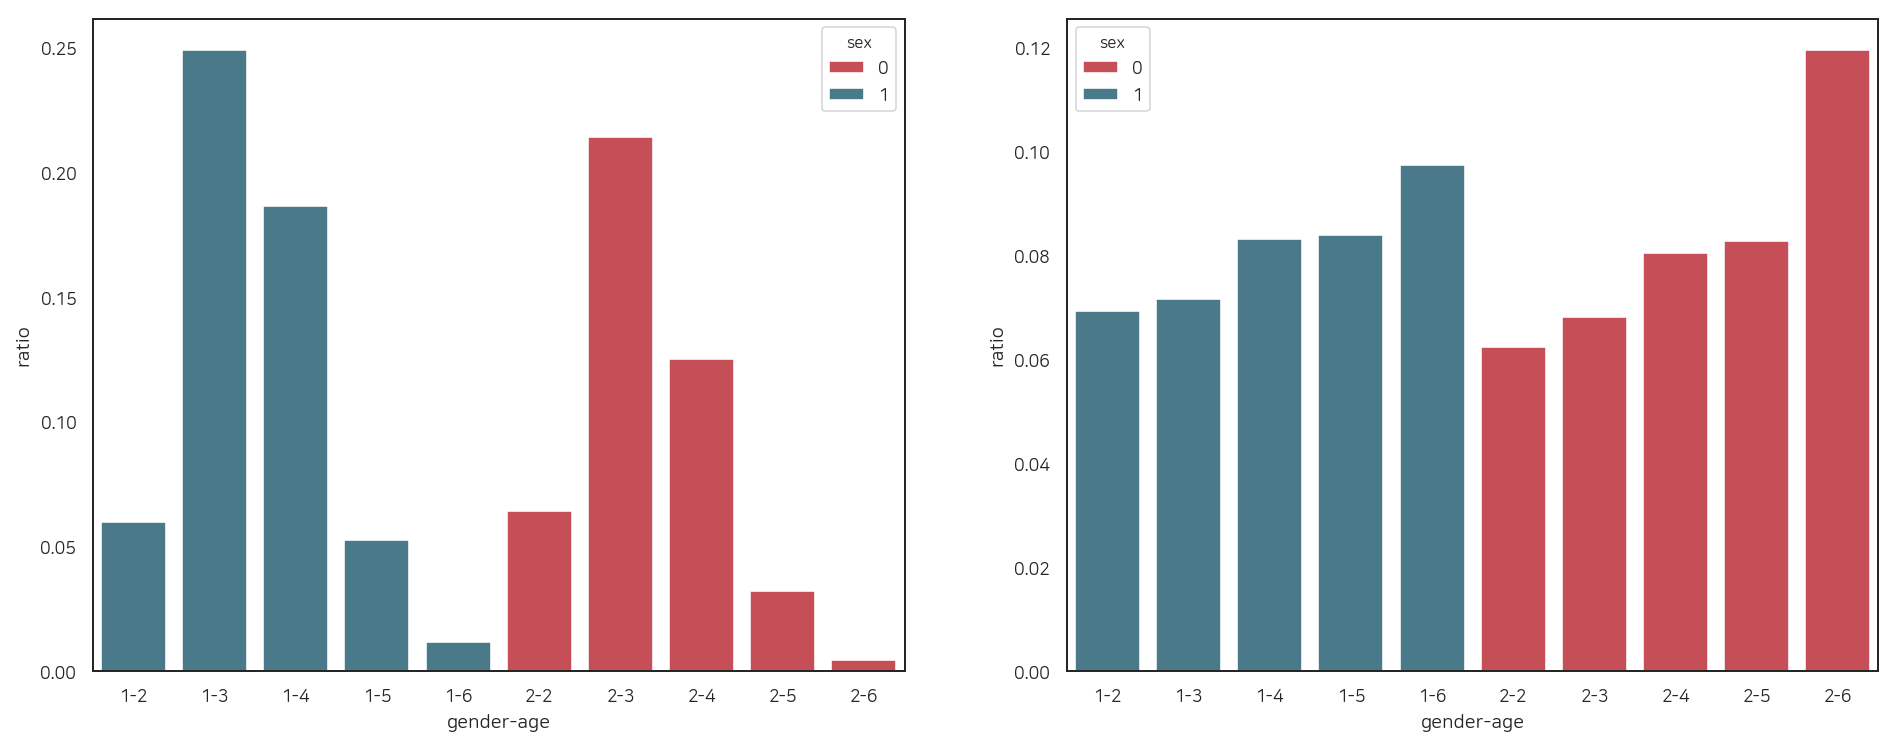

In [27]:
figure, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2)
figure.set_size_inches(16,6)
sns.barplot(data = oil_ratio, x = "gender-age", y = "ratio", hue = "sex", dodge=False, palette=sns.diverging_palette(10, 220, sep=80, n=2) , ax = ax1)
sns.barplot(data = pop_ratio_plot, x = "gender-age", y = "ratio", hue = "sex", dodge=False, palette=sns.diverging_palette(10, 220, sep=80, n=2) , ax = ax2);

## weight

pop_ratio_plot / oil_ratio

In [28]:
weight = pd.concat([pop_ratio_plot, oil_ratio], axis = 1)
weight.columns = ["gender-age","pop_ratio","sex1","gender-age2","oil_ratio","sex2"]
del weight["gender-age2"]
weight["weight"] = weight.apply(lambda x: x["pop_ratio"]/x["oil_ratio"], axis = 1)
weight = weight.set_index("gender-age")
# weight["ratio"] = pop_ratio_plot["ratio"] / oil_ratio["ratio"]

In [29]:
weight

,pop_ratio,sex1,oil_ratio,sex2,weight
gender-age,,,,,
1-2,0.069225,1,0.059767,1,1.158252
1-3,0.071655,1,0.249271,1,0.287460
1-4,0.083210,1,0.186589,1,0.445954
1-5,0.083865,1,0.052478,1,1.598100
1-6,0.097442,1,0.011662,1,8.355688
2-2,0.062290,0,0.064140,0,0.971155
2-3,0.068190,0,0.214286,0,0.318222
2-4,0.080496,0,0.125364,0,0.642096
2-5,0.082639,0,0.032070,0,2.576832


In [30]:
weight.to_csv("data/0225_weight.csv", encoding = "cp949")

# weight 사용 데이터 만들기

In [44]:
# gender 1,2 -> 0,1로 바꾸기
data = oil_r.copy()
data["gender"] = [0 if x==2 else x for x in data["gender"]]

In [45]:
# ps data의 categorical 지우기
delete_col = data.columns[3:19]
data = data.drop(delete_col, axis = 1)
print(data.shape)

(686, 2217)


#### payment 데이터에서 age 가져오기

In [46]:
# data의 PANEL 목록 가져오기
data_panel = list(data["PANEL_ID"])

In [47]:
# 결제정보 데이터 불러오기
pay = pd.read_csv("data/PANEL/PAYMENT data.csv", encoding = "cp949")
# data_panel에 필요한 결제정보만 불러오기
pay["index"] = pay.apply(lambda x: x["PANEL_ID"] in data_panel, axis = 1)

In [48]:
# 결제정보 데이터에서 panel_id, age만 불러오기
pay_age = pay[pay["index"] == 1][["PANEL_ID","age"]]
# panel_id 기준으로 unique만 거르기
pay_age = pay_age.groupby("PANEL_ID").mean().reset_index()

In [49]:
data["oil_GS"].unique()

array([0, 1], dtype=int64)

In [50]:
# age column 합치기 ( panel_id 기준 )
data2= pd.merge(data, pay_age, on="PANEL_ID")
# age_10 컬럼을 맨 뒤에 놓기
data_col = list(data2.columns)
data_col[2] = "age"
data_col[-1] = "age_10"
data2 = data2[data_col]
# data 저장하기
data2.to_csv("data/0219_numeric_data.csv")

In [51]:
weight.index  = ['1-2', '1-3', '1-4', '1-5', '1-6', '0-2', '0-3', '0-4', '0-5', '0-6']
weight

,pop_ratio,sex1,oil_ratio,sex2,weight
1-2,0.069225,1,0.059767,1,1.158252
1-3,0.071655,1,0.249271,1,0.287460
1-4,0.083210,1,0.186589,1,0.445954
1-5,0.083865,1,0.052478,1,1.598100
1-6,0.097442,1,0.011662,1,8.355688
0-2,0.062290,0,0.064140,0,0.971155
0-3,0.068190,0,0.214286,0,0.318222
0-4,0.080496,0,0.125364,0,0.642096
0-5,0.082639,0,0.032070,0,2.576832
0-6,0.119531,0,0.004373,0,27.332765


In [52]:
# panel_id drop
data_w = data2.drop("PANEL_ID", axis = 1)
# data_w.apply(lambda x: x * (weight.loc[x["gender"]+"-"+x["age_10"]]["weight"]), axis = 1).head()
data_w = data_w.apply(lambda x: x * (weight.loc[str(int(x["gender"]))+"-"+str(int(x["age_10"]))]["weight"]), axis = 1)
data_w = data_w.drop("age_10", axis =1)

In [53]:
data_w.to_csv("data/0219_numeric_weighted.csv")

---

# FA

In [43]:
fa_use_col = list(pd.DataFrame(pearson["oil_S-oil"].sort_values().dropna()[-60:]).reset_index()["index"])[:-1]
fa_use_col[:5]

['cnt_V LIVE',
 'cnt_Burgerking',
 'mean_왓챠플레이',
 'cnt_U+알뜰모바일 고객센터',
 'cnt_MONEY TREE']

In [44]:
# panel id 포함. weight된 것 -> fa에 사용
data_f = pd.concat([pd.DataFrame(data2["PANEL_ID"]), data_w], axis =1)
# target 4개 빼기
data_f = data_f.iloc[:,:-4]
# 사용할 컬럼만 filter
data_f = data_f[fa_use_col]
# data_f 정규화
from sklearn.preprocessing import normalize
data_f = pd.DataFrame(normalize(data_f, axis=0, norm='max'))

In [45]:
# data_f.to_csv("data/0219_fa_origin_2.csv", encoding = "cp949")

In [46]:
# FA
from sklearn.decomposition import FactorAnalysis
X = data_f.iloc[:,1:]
factor_num = 4
factor = FactorAnalysis(n_components=factor_num , random_state=101).fit(X)
factor_component = pd.DataFrame(factor.components_,columns=X.columns)
factor_component

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58
0,0.000577,-0.000148,0.003522,-0.001356,-0.000129,-0.000407,-0.000858,-0.000858,0.018272,-0.000187,-0.000874,-0.000112,-0.000899,-0.001371,0.019682,0.034335,-0.000878,-0.000376,-0.000238,-0.000981,-5.641419e-04,0.006164,-0.000362,-0.000397,-0.000269,0.011162,-0.000199,0.000075,0.034881,-0.000816,-0.000364,0.000840,0.010037,0.035025,-0.000234,0.041822,0.041822,0.034251,-0.000255,-0.000190,0.026991,0.026992,4.153720e-02,4.153720e-02,-0.000246,-0.000189,0.034620,-0.000797,-0.000132,-0.000214,-0.000136,-0.000622,-0.000180,-6.106717e-04,-6.106717e-04,-0.000175,-0.000688,-0.000650
1,-0.000496,-0.000090,-0.000077,0.037668,-0.000078,-0.000246,0.037998,0.037998,0.006611,-0.000113,0.037989,-0.000067,-0.000542,0.037689,-0.000836,0.000074,0.037986,-0.000227,-0.000144,0.037924,-3.404094e-04,0.001051,-0.000446,-0.000239,-0.000162,-0.000135,-0.000120,-0.000697,0.000415,0.038023,-0.000220,0.037975,-0.000814,0.000367,-0.000141,0.000540,0.000540,0.000057,-0.000154,-0.000115,0.000165,0.000166,5.608365e-04,5.608365e-04,-0.000149,-0.000135,0.000214,0.038033,-0.000080,-0.000129,-0.000082,0.038140,-0.000149,3.814745e-02,3.814745e-02,-0.000146,0.038069,0.038093
2,-0.001151,-0.000207,-0.000301,-0.000769,-0.000178,-0.000537,-0.000346,-0.000346,0.012109,-0.000244,-0.000221,-0.000154,0.000428,0.000031,-0.002141,-0.000206,0.000150,-0.000524,-0.000311,0.000465,-3.736023e-07,0.025112,0.027503,-0.000444,0.034634,-0.000634,-0.000273,0.001673,-0.000158,-0.000285,-0.000334,-0.000453,0.021907,0.000040,0.034688,-0.000031,-0.000031,0.003334,0.032173,-0.000265,-0.000504,-0.000502,1.285513e-10,1.285513e-10,-0.000241,0.034736,-0.000348,-0.000218,-0.000183,0.034720,0.034814,-0.000016,0.041728,1.206533e-10,1.206533e-10,0.041645,-0.000162,-0.000123
3,-0.000764,-0.000136,0.038072,-0.000327,0.038153,0.038557,-0.000156,-0.000156,0.000104,0.038256,-0.000036,0.038007,-0.000486,-0.000509,0.017001,-0.000708,-0.000238,-0.000310,-0.000182,-0.000280,-2.255602e-04,-0.001563,0.037942,-0.000269,-0.000012,-0.000369,0.000986,-0.000313,-0.000161,-0.000119,-0.000078,-0.000280,0.000703,-0.000125,0.000020,-0.000025,-0.000025,-0.000703,-0.000020,0.000144,0.000414,0.000415,-6.976257e-13,-6.976257e-13,-0.000184,0.002863,-0.000483,-0.000091,0.000592,0.000034,0.000109,-0.000006,-0.000006,4.765713e-12,4.765713e-12,-0.000001,-0.000001,0.000011


fa_A : 사람 * features<br>
fa_B : features * factors<br>
fa_C : 사람 * factors

fa_A * fa_B = fa_C

In [47]:
fa_A = data_f.iloc[:,1:]
print("fa_A shape : ", fa_A.shape)
fa_B = factor_component.T
B_col = list(range(len(fa_B.columns)))
B_col = ["Factor_" + str(1+x) for x in B_col]
print("fa_B shape : ", fa_B.shape)
fa_C = np.dot(fa_A,fa_B)
fa_C = pd.DataFrame(fa_C)
fa_C.columns = B_col
print("fa_C shape : ", fa_C.shape)
fa_C.head(5)

fa_A shape :  (686, 58)
fa_B shape :  (58, 4)
fa_C shape :  (686, 4)


,Factor_1,Factor_2,Factor_3,Factor_4
0,0.000904,0.000755,0.001084,-0.000051
1,0.000252,0.000205,0.001012,-0.000063
2,0.000557,0.000176,0.000818,-0.000031
3,0.000484,0.000174,0.000318,0.000942
4,0.000712,0.007086,0.000296,-0.000163


In [48]:
oil_target_1 = pd.DataFrame(data2["oil_GS"])
oil_target_2 = pd.DataFrame(data2["oil_SK"])
oil_target_3 = pd.DataFrame(data2["oil_S-oil"])
oil_target_4 = pd.DataFrame(data2["oil_HD"])
fa_1 = pd.concat([fa_C, oil_target_1], axis = 1)
fa_2 = pd.concat([fa_C, oil_target_2], axis = 1)
fa_3 = pd.concat([fa_C, oil_target_3], axis = 1)
fa_4 = pd.concat([fa_C, oil_target_4], axis = 1)

In [49]:
fa_3.to_csv("data/0219_1515_fa_3.csv")